In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving employee (1).csv to employee (1).csv


In [5]:
df = pd.read_csv(open('employee (1).csv', 'rb'))


In [6]:
df


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [7]:
for column in df.columns:
  print(f'колонка: {column}')


колонка: satisfaction_level
колонка: last_evaluation
колонка: number_project
колонка: average_montly_hours
колонка: time_spend_company
колонка: Work_accident
колонка: promotion_last_5years
колонка: department
колонка: salary
колонка: left


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [13]:
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df_drop.isnull().sum())


# Удаление строк с пропусками
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [14]:
df_median = df_test_nan.copy()
df_median.satisfaction_level = df_median.satisfaction_level.fillna(df_median.satisfaction_level.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum())


# Заполнение пропусков медианой
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [15]:
df_mean = df_test_nan.copy()
df_mean.satisfaction_level = df_mean.satisfaction_level.fillna(df_median.satisfaction_level.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum())


# Заполнение пропусков средним
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


⏰ В исходном наборе данных в качестве целевой переменной была выбрана переменная exceeds_monthly_hours_threshold, которая была получена из переменной average_montly_hours. Она указывает, превышал ли работник месячный порог рабочего времени (160 часов) или нет. Значение 1 указывает на превышение порога, а значение 0 — на его отсутствие.

In [16]:
df["exceeds_monthly_hours_threshold"] = np.where(df["average_montly_hours"] >= 160, 1, 0).astype(int)

In [17]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left',
       'exceeds_monthly_hours_threshold'],
      dtype='object')

In [20]:
Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left',
       'exceeds_monthly_hours_threshold'],
      dtype='object')

NameError: name 'Index' is not defined

In [21]:
 Y = df['exceeds_monthly_hours_threshold']
X = df.drop('exceeds_monthly_hours_threshold', axis=1)

X = X.drop('average_montly_hours', axis=1)

In [22]:
X.left = X.left.astype("category")
X.number_project = X.number_project.astype("category")
X.time_spend_company = X.time_spend_company.astype("category")
X.Work_accident = X.Work_accident.astype("category")
X.promotion_last_5years = X.promotion_last_5years.astype("category")
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [23]:
 X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  category
 3   time_spend_company     14999 non-null  category
 4   Work_accident          14999 non-null  category
 5   promotion_last_5years  14999 non-null  category
 6   department             14999 non-null  object  
 7   salary                 14999 non-null  object  
 8   left                   14999 non-null  category
dtypes: category(5), float64(2), object(2)
memory usage: 543.0+ KB


In [24]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left,exceeds_monthly_hours_threshold
0,0.38,0.53,2,157,3,0,0,sales,low,1,0
1,0.80,0.86,5,262,6,0,0,sales,medium,1,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1,1
3,0.72,0.87,5,223,5,0,0,sales,low,1,1
4,0.37,0.52,2,159,3,0,0,sales,low,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1,0
14995,0.37,0.48,2,160,3,0,0,support,low,1,1
14996,0.37,0.53,2,143,3,0,0,support,low,1,0
14997,0.11,0.96,6,280,4,0,0,support,low,1,1


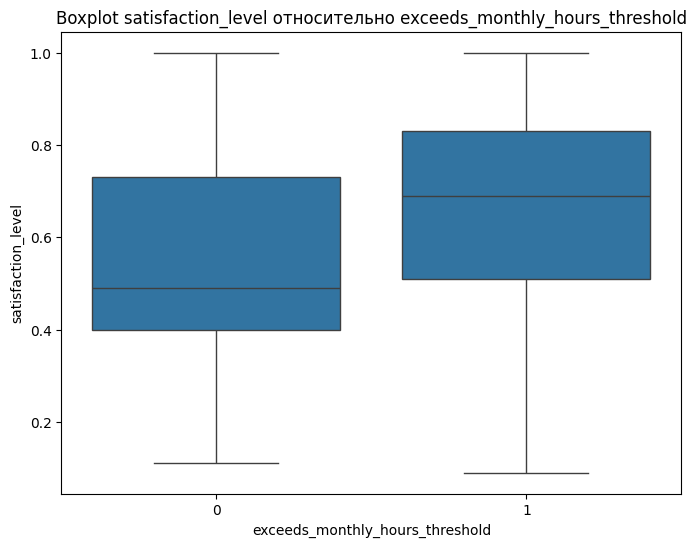

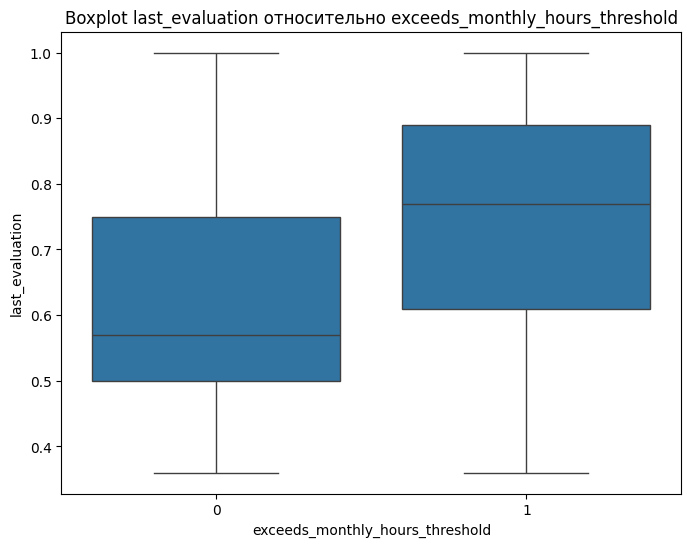

In [25]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='exceeds_monthly_hours_threshold', y=col, data=df)
    plt.title(f'Boxplot {col} относительно exceeds_monthly_hours_threshold')
    plt.show()

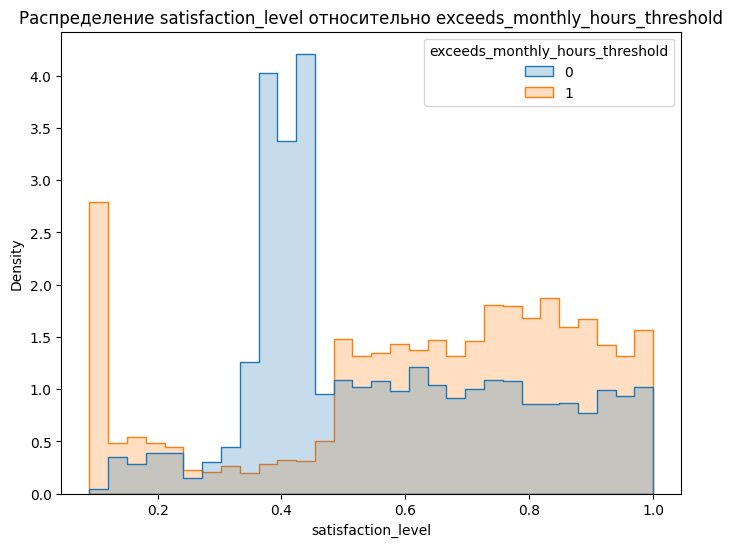

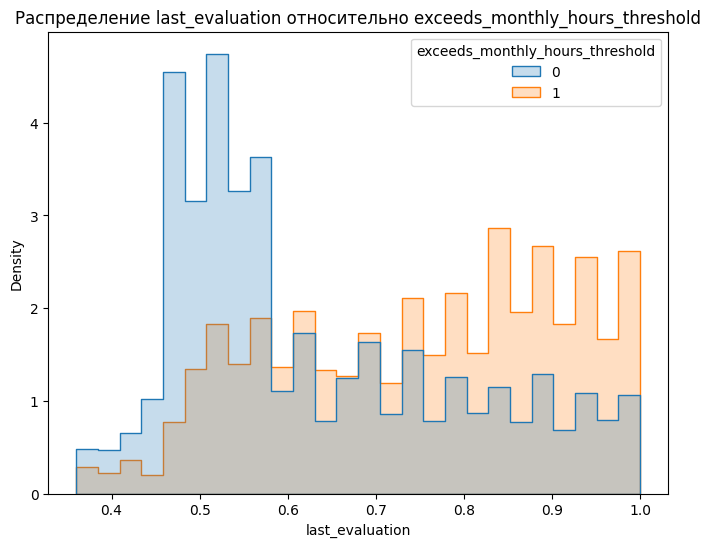

In [26]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='exceeds_monthly_hours_threshold', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно exceeds_monthly_hours_threshold')
    plt.show()


In [29]:
desc_stats_numeric = df.groupby('exceeds_monthly_hours_threshold')[X.select_dtypes(include=[np.number]).columns].describe()

desc_stats_categorical = df.groupby('exceeds_monthly_hours_threshold')[X.select_dtypes(include=['category', 'object']).columns].describe()

 Вывод

 ⏰ нужно сделать подобное описание для переменных

In [27]:
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('exceeds_monthly_hours_threshold')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для satisfaction_level:

                                   count      mean       std   min   25%  \
exceeds_monthly_hours_threshold                                            
0                                 4204.0  0.560495  0.210853  0.11  0.40   
1                                10795.0  0.633216  0.259036  0.09  0.51   

                                  50%   75%  max  
exceeds_monthly_hours_threshold                   
0                                0.49  0.73  1.0  
1                                0.69  0.83  1.0  


Описательная статистика для last_evaluation:

                                   count      mean       std   min   25%  \
exceeds_monthly_hours_threshold                                            
0                                 4204.0  0.630176  0.162447  0.36  0.50   
1                                10795.0  0.749565  0.162601  0.36  0.61   

                                  50%   75%  max  
exceeds_monthly_hours_threshold       

In [30]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


number_project                                \
                                         count      mean       std  min  25%   
exceeds_monthly_hours_threshold                                                
0                                       4204.0  3.117983  1.171016  2.0  2.0   
1                                      10795.0  4.069847  1.150253  2.0  3.0   

                                               time_spend_company            \
                                 50%  75%  max              count      mean   
exceeds_monthly_hours_threshold                                               
0                                3.0  4.0  7.0             4204.0  3.325404   
1                                4.0  5.0  7.0            10795.0  3.565540   

                                 ... promotion_last_5years          left  \
                                 ...                   75%  max    count   
exceeds_monthly_hours_threshold  ...                                       
0                                ...                   0.0  1.0   4204.0   
1                                ...                   0.0  1.0  10795.0   

                                                                              
                                     mean       std  min  25%  50%  75%  max  
exceeds_monthly_hours_threshold                                               
0                                0.363463  0.481054  0.0  0.0  0.0  1.0  1.0  
1                                0.189254  0.391729  0.0  0.0  0.0  0.0  1.0  

[2 rows x 40 columns]

Категориальные переменные:

 ⏰подобное описание для своих переменных

Средний уровень удовлетворенности работой выше у сотрудников с месячной рабочей нагрузкой, превышающей определенное пороговое значение (0,63 против 0,56). Этот факт предполагает, что те, кто работает больше, в среднем испытывают более высокое удовлетворение от работы.

Медианный уровень удовлетворенности также выше у сотрудников в этой группе (0,69 против 0,49), что дополнительно подтверждает возможную корреляцию между большим объемом работы и удовлетворенностью работой.

**Последняя оценка (Last Evaluation):**

Данные показывают, что между количеством отработанных часов и оценками работы сотрудников существует корреляция. Сотрудники, которые работают больше часов, в среднем получают более высокие оценки (0,75 против 0,63).

Медианная оценка также выше у сотрудников, превышающих пороговое значение рабочих часов (0,77 против 0,57). Эти результаты предполагают, что увеличение количества рабочих часов может привести к улучшению оценок работы.

**Количество проектов (Number of Projects):**

Работники, превышающие порог рабочих часов, демонстрируют более высокую производительность, работая над большим количеством проектов (4,06 против 3,12). Этот вывод согласуется с предположением о том, что увеличенная рабочая нагрузка приводит к повышенной продуктивности. Кроме того, медианное количество проектов также выше в этой группе (5 против 4), что указывает на более последовательный уровень производительности среди тех, кто превышает порог рабочих часов.

**Время, проведенное в компании (Time Spent in Company):**

Сотрудники, превышающие установленный лимит рабочих часов, как правило, работают в компании дольше, в среднем 3,57 года по сравнению с 3,32 года для тех, кто соблюдает лимит. Эта тенденция подтверждается более высокой медианой времени, проведенного в компании для тех, кто работает больше (4 года против 3 лет). Таким образом, возможно, что сотрудники с высокой нагрузкой испытывают большую лояльность к организации и предпочитают оставаться в ней в долгосрочной перспективе.

**Повышение за последние 5 лет (Promotion in the Last 5 Years):**

Частота получения повышения среди сотрудников, которые превышают порог рабочих часов, немного ниже (18.9% против 36.3% у тех, кто не превышает порог). Это может свидетельствовать о том, что высокий уровень рабочих часов не обязательно способствует карьерному росту.

**Ушедшие из компании (Left):**

Процент сотрудников, покинувших компанию, значительно выше среди тех, кто не превышает порог рабочих часов (36.3% против 18.9%). Это может свидетельствовать о том, что сотрудники с меньшей рабочей нагрузкой более склонны к увольнению.

**выводы:**

Связь между рабочим временем и показателями сотрудников

Исследования показали, что сотрудники, работающие больше часов, демонстрируют более высокие показатели, такие как:

 Высокие оценки
 Завершение большего количества проектов
 Более длительная продолжительность работы в компании

Однако, парадоксально, эти сотрудники реже получают повышение.

С другой стороны, сотрудники, работающие меньше часов, имеют более низкие показатели и чаще увольняются, что предполагает снижение мотивации или удовлетворенности.

In [31]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,exceeds_monthly_hours_threshold
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375,0.131372
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567,0.313280
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787,0.346857
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287,0.758037
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822,0.073868
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622,0.022344
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788,0.005567
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000,-0.183710
exceeds_monthly_hours_threshold,0.131372,0.313280,0.346857,0.758037,0.073868,0.022344,0.005567,-0.183710,1.000000


⏰ Интерпретируйте результаты
satisfaction_level и left (-0.388)Умеренная отрицательная корреляция между уровнем удовлетворенности сотрудников и тем, покинул ли сотрудник компанию. Это указывает на то, что сотрудники с более низким уровнем удовлетворенности с большей вероятностью покидают компанию. Этот признак может быть важным индикатором ухода сотрудников, поскольку связь достаточно сильная.last_evaluation и number_project (0.349) Есть умеренная положительная корреляция между последней оценкой сотрудника и количеством проектов, над которыми он работал. Это означает, что сотрудники, которые работают над большим количеством проектов, получают более высокие оценки на последних аттестациях. Этот признак может быть важным при оценке эффективности сотрудников.number_project и average_monthly_hours (0.417) Средняя положительная корреляция между количеством проектов и средним количеством рабочих часов. Чем больше проектов у сотрудника, тем больше его рабочая нагрузка в месяц. Это вполне ожидаемая связь, которая указывает на то, что сотрудники с большим количеством проектов обычно работают дольше.time_spend_company и left (0.144) Небольшая положительная корреляция между количеством лет, проведённых в компании, и уходом сотрудника. Это может означать, что сотрудники, которые работают дольше, иногда с большей вероятностью покидают компанию, возможно, из-за выгорания или достижения максимума развития.exceeds_monthly_hours_threshold и left (-0.184) Умеренная отрицательная корреляция между превышением порога рабочих часов и увольнением сотрудника. Это может означать, что сотрудники, которые работают больше часов, менее склонны покидать компанию. Возможно, они больше вовлечены в свою работу или более мотивированы оставаться.

Выводы:

Предикторы текучести кадров:

 Удовлетворенность работой: Низкая удовлетворенность работой связана с повышенной вероятностью ухода сотрудников.
 Рабочая нагрузка и часы работы: Большее количество проектов приводит к увеличению рабочих часов.
 Переработка: Сотрудники, которые работают сверх нормы (превышают порог), демонстрируют более низкие показатели текучести и могут дольше оставаться в компании.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [33]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['number_project', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'salary', 'left']


In [34]:
X_processed = X.copy()

X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True)

In [35]:
X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_3,time_spend_company_4,time_spend_company_5,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_1
0,0.38,0.53,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.80,0.86,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,0.11,0.88,False,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,True
3,0.72,0.87,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
4,0.37,0.52,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14995,0.37,0.48,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14996,0.37,0.53,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14997,0.11,0.96,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [36]:
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['satisfaction_level', 'last_evaluation']


In [37]:
scaler = MinMaxScaler()

X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [38]:
 X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_3,time_spend_company_4,time_spend_company_5,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left_1
0,0.318681,0.265625,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
1,0.780220,0.781250,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,0.021978,0.812500,False,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,True,True
3,0.692308,0.796875,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,False,True
4,0.307692,0.250000,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14995,0.307692,0.187500,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14996,0.307692,0.265625,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
14997,0.021978,0.937500,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True


In [39]:
def train_and_evaluate(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    model = LogisticRegression(max_iter=1000)

    model.fit(X_train, Y_train)

    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [40]:
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.8027
Точность на тестовой выборке: 0.8033

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.80      0.40      0.53       841
           1       0.80      0.96      0.88      2159

    accuracy                           0.80      3000
   macro avg       0.80      0.68      0.70      3000
weighted avg       0.80      0.80      0.78      3000



In [41]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                    Feature  Coefficient
6          number_project_7     3.626162
5          number_project_6     2.201487
4          number_project_5     1.665400
1           last_evaluation     1.511318
3          number_project_4     1.482949
2          number_project_3     1.346668
0        satisfaction_level     0.706277
12     time_spend_company_8    -0.507631
27                   left_1    -0.483231
9      time_spend_company_5     0.461822
13    time_spend_company_10    -0.322563
18            department_hr    -0.317497
7      time_spend_company_3    -0.267592
21   department_product_mng    -0.264505
8      time_spend_company_4     0.233911
17    department_accounting    -0.226458
10     time_spend_company_6     0.226015
23       department_support    -0.175887
16         department_RandD    -0.152390
24     department_technical    -0.137893
20     department_marketing    -0.124408
11     time_spend_company_7     0.104564
15  promotion_last_5years_1    -0.101917
26            sa

In [42]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.8022
Отклонение точности: 0.0954


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

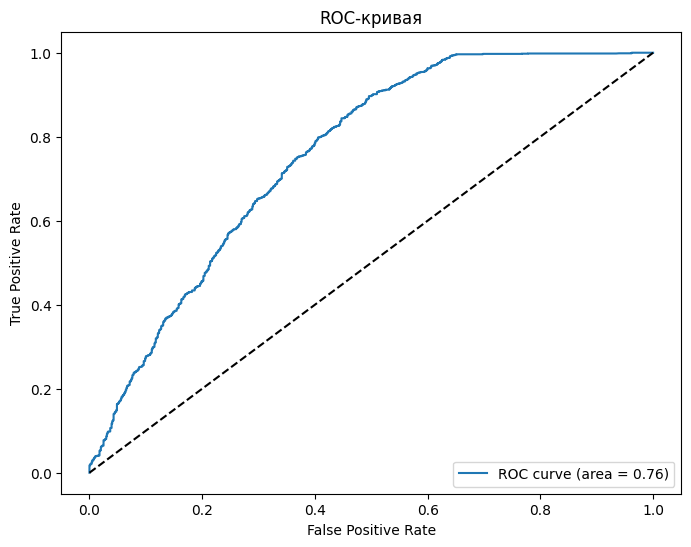

In [44]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()